# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record_count = 1
set_count = 1

city_names = []
country = []
ids = []
lang = []
temp = []
humidity = []
cloudiness = []
wind = []

from urllib.parse import quote

print("Beginning Data Retrieval")
print("=========================")


for city in cities:
    
    
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + quote(city)
    
    response = requests.get(base_url)
    data = response.json()
    
    if data['cod'] == 200:
        print("Processing record " + str(record_count) + " of Set " + str(set_count) + " | " + city)
        print(base_url)
        
        city_names.append(data["name"])
        country.append(data["sys"]["country"])
        ids.append(data["id"])
        lang.append(data["coord"]["lat"])
        temp.append(data["main"]["temp"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data['wind']['speed'])
        record_count += 1

        time.sleep(1.20)

        if record_count > 50:
            time.sleep(15)
            set_count += 1
            record_count = 1

print("==========================")
print("Data Retrieval Complete")
print("==========================")

Beginning Data Retrieval
Processing record 1 of Set 1 | payson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=payson
Processing record 2 of Set 1 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=longyearbyen
Processing record 3 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=bluff
Processing record 4 of Set 1 | tieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=tieli
Processing record 5 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=atuona
Processing record 6 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=bredasdorp
Processing record 7 of Set 1 | albany
http://api.openweathermap.org/dat

Processing record 5 of Set 2 | nhamunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=nhamunda
Processing record 6 of Set 2 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=codrington
Processing record 7 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=mar%20del%20plata
Processing record 8 of Set 2 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=norman%20wells
Processing record 9 of Set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=hilo
Processing record 10 of Set 2 | auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=auki
Processing record 11 of Set 2 | touros
http://api.openweathermap.org/data/2

Processing record 8 of Set 3 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=hami
Processing record 9 of Set 3 | duncan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=duncan
Processing record 10 of Set 3 | bowen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=bowen
Processing record 11 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=chokurdakh
Processing record 12 of Set 3 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=acapulco
Processing record 13 of Set 3 | aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=aquiraz
Processing record 14 of Set 3 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing record 12 of Set 4 | linxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=linxia
Processing record 13 of Set 4 | agadez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=agadez
Processing record 14 of Set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=saskylakh
Processing record 15 of Set 4 | kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=kurilsk
Processing record 16 of Set 4 | victoria falls
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=victoria%20falls
Processing record 17 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=thompson
Processing record 18 of Set 4 | martil
http://api.openweathermap.org/data/2.

Processing record 16 of Set 5 | alma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=alma
Processing record 17 of Set 5 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=kapaa
Processing record 18 of Set 5 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=mahebourg
Processing record 19 of Set 5 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=hamilton
Processing record 20 of Set 5 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=leningradskiy
Processing record 21 of Set 5 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=mehamn
Processing record 22 of Set 5 | machico
http://api.openweathermap.org/data/2.5/weather?u

Processing record 19 of Set 6 | blairmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=blairmore
Processing record 20 of Set 6 | islahiye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=islahiye
Processing record 21 of Set 6 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=amapa
Processing record 22 of Set 6 | filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=filadelfia
Processing record 23 of Set 6 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=mogadishu
Processing record 24 of Set 6 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=tuktoyaktuk
Processing record 25 of Set 6 | wadi musa
http://api.openweathermap.org/da

Processing record 23 of Set 7 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=katsuura
Processing record 24 of Set 7 | offa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=offa
Processing record 25 of Set 7 | nador
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=nador
Processing record 26 of Set 7 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=lazaro%20cardenas
Processing record 27 of Set 7 | zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=zhangye
Processing record 28 of Set 7 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=half%20moon%20bay
Processing record 29 of Set 7 | makueni
http://api.openweathermap.or

Processing record 27 of Set 8 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=yanam
Processing record 28 of Set 8 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=kiama
Processing record 29 of Set 8 | turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=turukhansk
Processing record 30 of Set 8 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=japura
Processing record 31 of Set 8 | karksi-nuia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=karksi-nuia
Processing record 32 of Set 8 | favara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=favara
Processing record 33 of Set 8 | rodrigues alves
http://api.openweathermap.org/data/2.5/weath

Processing record 31 of Set 9 | kaoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=kaoma
Processing record 32 of Set 9 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=sitka
Processing record 33 of Set 9 | virginia beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=virginia%20beach
Processing record 34 of Set 9 | gazanjyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=gazanjyk
Processing record 35 of Set 9 | bodden town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=bodden%20town
Processing record 36 of Set 9 | mitu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=mitu
Processing record 37 of Set 9 | kholm
http://api.openweathermap.org/data/2.5/wea

Processing record 35 of Set 10 | zharkent
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=zharkent
Processing record 36 of Set 10 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=havre-saint-pierre
Processing record 37 of Set 10 | balabac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=balabac
Processing record 38 of Set 10 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=vostok
Processing record 39 of Set 10 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=grand%20gaube
Processing record 40 of Set 10 | shellbrook
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=shellbrook
Processing record 41 of Set 10 | lyuban
http://api

Processing record 38 of Set 11 | supe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=supe
Processing record 39 of Set 11 | cardoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=cardoso
Processing record 40 of Set 11 | setubal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=setubal
Processing record 41 of Set 11 | yarada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=yarada
Processing record 42 of Set 11 | siilinjarvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=siilinjarvi
Processing record 43 of Set 11 | merghindeal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a354e83f340c305d19242e05a694d073&q=merghindeal
Processing record 44 of Set 11 | nara
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_names_series = pd.Series(city_names)
country_series = pd.Series(country)
ids_series = pd.Series(ids)
lang_series = pd.Series(lang)
temp_series = pd.Series(temp)
humidity_series = pd.Series(humidity)
cloudiness_series = pd.Series(cloudiness)
wind_series = pd.Series(wind)

data_dict = {'City':city_names_series, 'Country':country_series, "Id's":ids_series, 'Lat':lang_series, 'Temperature':
            temp_series, "Humidity":humidity_series, 'Cloudiness':cloudiness_series, 'Wind Speed':wind_series}

dframe = pd.DataFrame(data_dict)
dframe.head()

,City,Country,Id's,Lat,Temperature,Humidity,Cloudiness,Wind Speed
0,Payson,US,5779548,40.04,85.86,18,1,8.05
1,Longyearbyen,NO,2729907,78.22,48.20,70,75,21.92
2,Bluff,AU,2175403,-23.58,54.79,85,100,2.82
3,Tieli,CN,2034440,46.98,57.49,96,88,5.79
4,Atuona,PF,4020109,-9.80,80.53,78,6,15.05


In [6]:
export_csv = dframe.to_csv ('export_dataframe.csv', index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

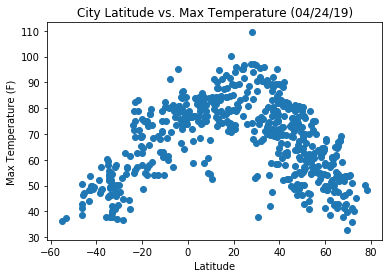

In [7]:
latvstemp = plt.scatter(dframe['Lat'], dframe['Temperature'])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature " + "(" + "F" + ")")
plt.title("City Latitude vs. Max Temperature " + "(" + "04/24/19" + ")")
plt.savefig('city-lat-vs-maxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

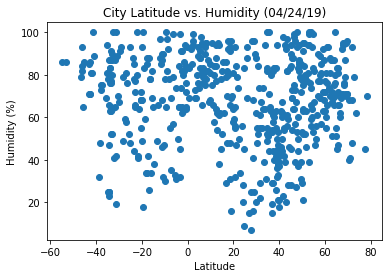

In [8]:
latvshum = plt.scatter(dframe['Lat'], dframe['Humidity'])
plt.xlabel("Latitude")
plt.ylabel("Humidity " + "(" + "%" + ")")
plt.title("City Latitude vs. Humidity " + "(" + "04/24/19" + ")")
latvshum
plt.savefig("city-lat-vs-humidity.png")

#### Latitude vs. Cloudiness Plot

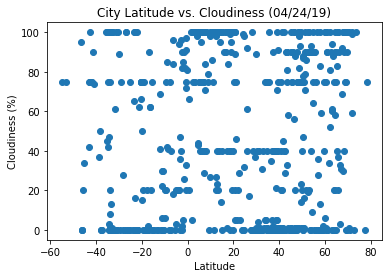

In [9]:
latvscloud = plt.scatter(dframe['Lat'], dframe['Cloudiness'])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness " + "(" + "%" + ")")
plt.title("City Latitude vs. Cloudiness " + "(" + "04/24/19" + ")")
latvscloud
plt.savefig("city-lat-vs-cloudiness.png")

#### Latitude vs. Wind Speed Plot

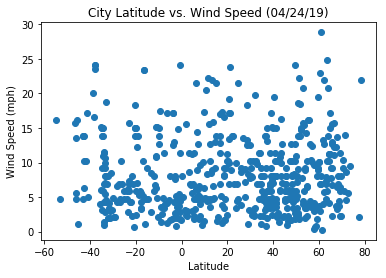

In [10]:
latvswindspeed = plt.scatter(dframe['Lat'], dframe['Wind Speed'])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed " + "(" + "mph" + ")")
plt.title("City Latitude vs. Wind Speed " + "(" + "04/24/19" + ")")
latvswindspeed
plt.savefig("city-lat-vs-wind-speed.png")

#### 